In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from random import shuffle
from scipy.stats import entropy
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import nashpy as nash
import random
import tensorflow as tf
import six
from open_spiel.python import policy

import open_spiel
from open_spiel.python.algorithms import cfr
from open_spiel.python.algorithms import outcome_sampling_mccfr

from open_spiel.python.algorithms import cfr_random_chance
# from open_spiel.python.algorithms import cfr_br_actions
from open_spiel.python.algorithms import exploitability
from open_spiel.python.algorithms import exploitability_br_actions
from open_spiel.python.algorithms import fictitious_play
from open_spiel.python.algorithms import fictitious_play_EF
from open_spiel.python.algorithms import fictitious_play_br_actions
# from open_spiel.python.algorithms import deep_cfr

from open_spiel.python import policy
from open_spiel.python.algorithms import nfsp


# from open_spiel.python.algorithms import lp_solver
# from open_spiel.python.algorithms import outcome_sampling_mccfr
# from open_spiel.python.algorithms import external_sampling_mccfr
# from open_spiel.python.algorithms import external_sampling_mccfr_br_actions
# from open_spiel.python.algorithms import outcome_sampling_mccfr_br_actions
# from open_spiel.python.algorithms import psro_oracle
from open_spiel.python import rl_environment
from open_spiel.python import rl_environment_br_actions


from open_spiel.python.algorithms import best_response as pyspiel_best_response
import pyspiel
import time
from numpy import array

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
cfr_exps1 = np.load("./results/cfr_leduc_poker_dummy_random_br_True_2_actions_infostates_seed1_exps.npy")
cfr_infostates1 = np.load("./results/cfr_leduc_poker_dummy_random_br_True_2_actions_infostates_seed1_infostates.npy")
cfr_times1 = np.load("./results/cfr_leduc_poker_dummy_random_br_True_2_actions_infostates_seed1_times.npy")
cfr_do_exps1 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_False_2_actions_infostates_seed1_exps.npy")
cfr_do_infostates1 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_False_2_actions_infostates_seed1_infostates.npy")
cfr_do_times1 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_False_2_actions_infostates_seed1_times.npy")
# cfr_do_exps2 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_True_2_actions_infostates_seed2_exps.npy")
# cfr_do_infostates2 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_True_2_actions_infostates_seed2_infostates.npy")
# cfr_do_exps3 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_True_2_actions_infostates_seed3_exps.npy")
# cfr_do_infostates3 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_True_2_actions_infostates_seed3_infostates.npy")
# cfr_do_exps7 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_False_7_actions_infostates_seed1_exps.npy")
# cfr_do_infostates7 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_False_7_actions_infostates_seed1_infostates.npy")
# cfr_exps7 = np.load("./results/cfr_leduc_poker_dummy_random_br_False_7_actions_infostates_seed1_exps.npy")
# cfr_infostates7 = np.load("./results/cfr_leduc_poker_dummy_random_br_False_7_actions_infostates_seed1_infostates.npy")

# cfr_exps2 = np.load("./results/cfr_leduc_poker_dummy_iters_1000000_2_actions_seed2_exps.npy")
# cfr_times2 = np.load("./results/cfr_leduc_poker_dummy_iters_1000000_2_actions_seed2_times.npy")
# cfr_episodes2 = np.load("./results/cfr_leduc_poker_dummy_iters_1000000_2_actions_seed2_episodes.npy")
# cfr_do_exps2 = np.load("./results/cfr_psro_leduc_poker_dummy_iters_1000000_2_actions_seed2_exps.npy")
# cfr_do_times2 = np.load("./results/cfr_psro_leduc_poker_dummy_iters_1000000_2_actions_seed2_times.npy")
# cfr_do_episodes2 = np.load("./results/cfr_psro_leduc_poker_dummy_iters_1000000_2_actions_seed2_episodes.npy")

# cfr_do_rand_exps1 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_True_2_actions_seed1_exps.npy")
# cfr_do_rand_times1 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_True_2_actions_seed1_times.npy")
# cfr_do_rand_episodes1 = np.load("./results/cfr_psro_leduc_poker_dummy_random_br_True_2_actions_seed1_episodes.npy")

xfp_times = np.load("./results/xfp_leduc_poker_dummy_iters_1000000_2_actions_seed2_times.npy")
xfp_exps = np.load("./results/xfp_leduc_poker_dummy_iters_1000000_2_actions_seed2_exps.npy")

psro_times = np.load("./results/psro_leduc_poker_dummy_iters_1000000_2_actions_seed1_times.npy")
psro_exps = np.load("./results/psro_leduc_poker_dummy_iters_1000000_2_actions_seed1_exps.npy")

# plt.plot(cfr_times1/3600, cfr_exps1, label="CFR")
# plt.plot(cfr_do_times1/3600, cfr_do_exps1, label="XDO")
plt.plot(cfr_infostates1[:70], cfr_exps1[:70], label="CFR")
# plt.plot(cfr_infostates7[:70], cfr_exps7[:70], label="CFR - 7 actions")
# plt.plot(cfr_do_episodes2, cfr_do_exps2, label="XDO")
plt.plot(cfr_do_infostates1, cfr_do_exps1, label="XDO")
# plt.plot(cfr_do_exps1, label="XDO")
# plt.plot([i*5 for i in range(psro_exps.shape[0])], psro_exps, label="PSRO")

# plt.plot(cfr_do_infostates7, cfr_do_exps7, label="XDO - 7 actions")

# plt.plot(psro_times/3600, psro_exps, label="PSRO")
# plt.plot(xfp_times/3600, xfp_exps, label="XFP")
plt.legend()
plt.yscale("log")
# plt.xscale("log")
plt.title("Dummy Leduc Two Actions")
plt.xlabel("Iterations")
plt.ylabel("Exploitability")
plt.show()

In [ ]:
psro_exps = np.load("./results/psro_leduc_poker_random_br_Falseseed1_exps.npy")
psro_exps

In [ ]:
print(cfr_do_times1)
print(cfr_times1[100])
print(cfr_do_exps1[-1])
print(cfr_exps1[100])
print(cfr_exps1[100]/cfr_do_exps1[-1])
print(xfp_times[-7])
print(xfp_exps[-7]/cfr_do_exps1[-1])

In [ ]:
cfr_infostates1

In [ ]:
dummy_exps = np.load('./results/nfsp_do_leduc_poker_dummy_random_br_False1_raise_1_suit_10_chips_200_actions_exps.npy')
dummy_times = np.load('./results/nfsp_do_leduc_poker_dummy_random_br_False1_raise_1_suit_10_chips_200_actions_times.npy')
dummy_episodes = np.load('./results/nfsp_do_leduc_poker_dummy_random_br_False1_raise_1_suit_10_chips_200_actions_episodes.npy')

dummy_random_br_exps = np.load('./results/nfsp_do_leduc_poker_dummy_random_br_True1_raise_1_suit_10_chips_200_actions_exps.npy')
dummy_random_br_times = np.load('./results/nfsp_do_leduc_poker_dummy_random_br_True1_raise_1_suit_10_chips_200_actions_times.npy')
dummy_random_br_episodes = np.load('./results/nfsp_do_leduc_poker_dummy_random_br_True1_raise_1_suit_10_chips_200_actions_episodes.npy')

nfsp_dummy_exps = np.load('./results/nfsp_leduc_poker_dummy1_raise_1_suit_10_chips_200_actions_exps.npy')
nfsp_dummy_times = np.load('./results/nfsp_leduc_poker_dummy1_raise_1_suit_10_chips_200_actions_times.npy')
nfsp_dummy_episodes = np.load('./results/nfsp_leduc_poker_dummy1_raise_1_suit_10_chips_200_actions_episodes.npy')

plt.plot(dummy_random_br_times, dummy_random_br_exps, label='nfsp-do random BR')
plt.plot(dummy_times, dummy_exps, label='nfsp-do')
plt.plot(nfsp_dummy_times, nfsp_dummy_exps, label='nfsp dummy')
plt.legend()
plt.title("Dummy Leduc Wall Clock")
# plt.yscale('log')
plt.show()

plt.plot(dummy_random_br_episodes, dummy_random_br_exps, label='nfsp-do random BR')
plt.plot(dummy_episodes, dummy_exps, label='nfsp-do')
plt.plot(nfsp_dummy_episodes[:400], nfsp_dummy_exps[:400], label='nfsp dummy')
plt.legend()
plt.title("Dummy Leduc Episodes")
plt.yscale('log')
plt.show()

In [ ]:
dummy_episodes

In [ ]:
dummy_random_br_exps = np.load('./results/nfsp_do_kuhn_poker_dummy_random_br_True_exps.npy')
dummy_random_br_times = np.load('./results/nfsp_do_kuhn_poker_dummy_random_br_True_times.npy')
dummy_random_br_episodes = np.load('./results/nfsp_do_kuhn_poker_dummy_random_br_True_episodes.npy')

dummy_exps = np.load('./results/nfsp_do_kuhn_poker_dummy_random_br_False_exps.npy')
dummy_times = np.load('./results/nfsp_do_kuhn_poker_dummy_random_br_False_times.npy')
dummy_episodes = np.load('./results/nfsp_do_kuhn_poker_dummy_random_br_False_episodes.npy')

nfsp_dummy_exps = np.load('./results/nfsp_kuhn_poker_dummy_exps.npy')
nfsp_dummy_times = np.load('./results/nfsp_kuhn_poker_dummy_times.npy')
nfsp_dummy_episodes = np.load('./results/nfsp_kuhn_poker_dummy_episodes.npy')

plt.plot(dummy_random_br_times, dummy_random_br_exps, label='nfsp-do random BR')
plt.plot(dummy_times, dummy_exps, label='nfsp-do')
plt.plot(nfsp_dummy_times, nfsp_dummy_exps, label='nfsp dummy')
plt.legend()
plt.title("Dummy Kuhn Wall Clock")
# plt.yscale('log')
plt.show()

plt.plot(dummy_random_br_episodes, dummy_random_br_exps, label='nfsp-do random BR')
plt.plot(dummy_episodes, dummy_exps, label='nfsp-do')
plt.plot(nfsp_dummy_episodes, nfsp_dummy_exps, label='nfsp dummy')
plt.legend()
plt.title("Dummy Kuhn Episodes")
# plt.yscale('log')
plt.show()

In [ ]:
cfr_exps =np.load("./results/cfr_leduc_poker_iters_1000000_exps.npy")
cfr_times =np.load("./results/cfr_leduc_poker_iters_1000000_times.npy")
cfr_200_exps =np.load("./results/cfr_leduc_poker_dummy_iters_1000000normal_200_actions_exps.npy")
cfr_200_times =np.load("./results/cfr_leduc_poker_dummy_iters_1000000normal_200_actions_times.npy")

xfp_200_exps =np.load("./results/xfp_leduc_poker_dummy_iters_1000000normal_200_actions_exps.npy")
xfp_200_times =np.load("./results/xfp_leduc_poker_dummy_iters_1000000normal_200_actions_times.npy")
xfp_exps =np.load("./results/xfp_leduc_poker_iters_1000000_exps.npy")
xfp_times =np.load("./results/xfp_leduc_poker_iters_1000000_times.npy")

nfsp_dummy_exps4 = np.load('./results/nfsp_leduc_poker_dummy1_raise_1_suit_10_chips_4_actions_exps.npy')
nfsp_dummy_times4 = np.load('./results/nfsp_leduc_poker_dummy1_raise_1_suit_10_chips_4_actions_times.npy')
nfsp_dummy_episodes4 = np.load('./results/nfsp_leduc_poker_dummy1_raise_1_suit_10_chips_4_actions_episodes.npy')

nfsp_dummy_exps200 = np.load('./results/nfsp_leduc_poker_dummy1_raise_1_suit_10_chips_200_actions_exps.npy')
nfsp_dummy_times200 = np.load('./results/nfsp_leduc_poker_dummy1_raise_1_suit_10_chips_200_actions_times.npy')
nfsp_dummy_episodes200 = np.load('./results/nfsp_leduc_poker_dummy1_raise_1_suit_10_chips_200_actions_episodes.npy')

nfsp_dummy_exps200_normal = np.load('./results/nfsp_leduc_poker_dummynormal_200_actions_exps.npy')
nfsp_dummy_times200_normal = np.load('./results/nfsp_leduc_poker_dummynormal_200_actions_times.npy')
nfsp_dummy_episodes200_normal = np.load('./results/nfsp_leduc_poker_dummynormal_200_actions_episodes.npy')

nfsp_dummy_exps = np.load('./results/nfsp_leduc_poker_dummy1_raise_1_suit_10_chips_exps.npy')
nfsp_dummy_times = np.load('./results/nfsp_leduc_poker_dummy1_raise_1_suit_10_chips_times.npy')
nfsp_dummy_episodes = np.load('./results/nfsp_leduc_poker_dummy1_raise_1_suit_10_chips_episodes.npy')

nfsp_exps = np.load('./results/nfsp_leduc_poker_exps.npy')
nfsp_times = np.load('./results/nfsp_leduc_poker_times.npy')
nfsp_episodes = np.load('./results/nfsp_leduc_poker_episodes.npy')

# plt.plot(nfsp_dummy_times200, nfsp_dummy_exps200, label='200 actions nfsp')
plt.plot(nfsp_dummy_episodes200_normal, nfsp_dummy_exps200_normal, label='200 actions dummy leduc nfsp')
plt.plot(nfsp_episodes, nfsp_exps, label='leduc nfsp')
plt.legend()
plt.title('NFSP Dummy Leduc Episodes')
plt.show()

plt.plot(xfp_exps, label='Leduc')
plt.plot(xfp_200_exps, label='200 actions')
plt.legend()
plt.title('XFP Dummy Leduc Episodes')
plt.show()

plt.plot(cfr_exps[:20], label='4')
plt.plot(cfr_200_exps[:20], label='200')
plt.legend()
plt.yscale('log')
plt.title('CFR Dummy Leduc Episodes')
plt.show()

In [ ]:
game = pyspiel.load_game("leduc_poker_dummy", {'players': pyspiel.GameParameter(2)})

In [ ]:
game = pyspiel.load_game("leduc_poker")

In [ ]:
# numBoardCards and stack take strings but crash when you give it a string
# numRounds crashes when I give it 3

game = pyspiel.load_game("universal_poker"
                         ,{"numPlayers": pyspiel.GameParameter(2), 
                           "betting": pyspiel.GameParameter("nolimit"),
                           "numRanks": pyspiel.GameParameter(3),
                           "numRounds": pyspiel.GameParameter(2),
                           "numSuits": pyspiel.GameParameter(2),
                           "stack": pyspiel.GameParameter("12 12"),
                           "blind": pyspiel.GameParameter("1 1"),
                           "raiseSize": pyspiel.GameParameter("1 1"),
                           "bettingAbstraction": pyspiel.GameParameter("fullgame"),})


In [ ]:
game = pyspiel.load_game("oshi_zumo", {"coins": pyspiel.GameParameter(8), 
                           "size": pyspiel.GameParameter(3),
                                      "horizon": pyspiel.GameParameter(100), 
                                      "min_bid": pyspiel.GameParameter(1)})

In [ ]:
root = game.new_initial_state()
print(root)
print(root.child(0).child(0).child(0))

In [ ]:
object_methods = [method_name for method_name in dir(game)
                  if callable(getattr(game, method_name))]
object_methods

In [ ]:
def _full_best_response_policy(br_infoset_dict):
    """Turns a dictionary of best response action selections into a full policy.

  Args:
    br_infoset_dict: A dictionary mapping information state to a best response
      action.

  Returns:
    A function `state` -> list of (action, prob)
  """

    def wrap(state):
        infostate_key = state.information_state_string(state.current_player())
        br_action = br_infoset_dict[infostate_key]
        ap_list = []
        for action in state.legal_actions():
            ap_list.append((action, 1.0 if action == br_action else 0.0))
        return ap_list

    return wrap

def _policy_dict_at_state(callable_policy, state):
    """Turns a policy function into a dictionary at a specific state.

  Args:
    callable_policy: A function from `state` -> lis of (action, prob),
    state: the specific state to extract the policy from.

  Returns:
    A dictionary of action -> prob at this state.
  """

    infostate_policy_list = callable_policy(state)
    infostate_policy = {}
    for ap in infostate_policy_list:
        infostate_policy[ap[0]] = ap[1]
    return infostate_policy


In [ ]:
xfp_solver = fictitious_play.XFPSolver(game)
xfp_solver_EF = fictitious_play_EF.XFPSolver(game)

convs = []
ef_convs = []
for i in range(200):
    xfp_solver.iteration()
    conv = exploitability.exploitability(game, xfp_solver.average_policy())
    if i % 5 == 0:
        print("Iteration: {} Conv: {}".format(i, conv))
    convs.append(conv)
    xfp_solver_EF.iteration()
    ef_conv = exploitability.exploitability(game, xfp_solver_EF.average_policy())
    if i % 5 == 0:
        print("Iteration: {} EF Conv: {}".format(i, ef_conv))
    ef_convs.append(ef_conv)

In [ ]:
plt.plot(convs, label='XFP')
plt.plot(ef_convs, label='EF_XFP')
plt.legend()
plt.yscale('log')
plt.show()

In [ ]:
# brs = []
# info_test = []
# # different from cfr, use br_info dict from infostate to br action instead of full br policy
# for i in range(2):
#     br_info = exploitability.best_response(game, xfp_solver.average_policy(), i)
# #     full_br_policy = _full_best_response_policy(br_info["best_response_action"])
#     info_sets = br_info['info_sets']
#     info_test.append(info_sets)
# #     brs.append(full_br_policy)
#     brs.append(br_info)


# iters = 3500
# br_list = [brs]
# # br_list = []
# info_set_list = []

# start_time = time.time()
# xfp_do_times = []
# xfp_do_exps = []

# br_conv_threshold = 1

# for i in range(iters):
#     print('Iteration: ', i)
#     xfp_br_solver = fictitious_play_br_actions.XFPSolver(game, br_list)
    
#     j = 0
#     br_list_conv = 1000
#     while br_list_conv > br_conv_threshold:
#         j += 1
#         xfp_br_solver.iteration()
# #         if j%10==0:
#         if j%1==0:
# #             print(j)
#             br_list_conv = exploitability_br_actions.exploitability(game, br_list, 
#                                                                     xfp_br_solver.average_policy())
#             print("Br list conv: ", br_list_conv, j)
            
#     conv = exploitability.exploitability(game, xfp_br_solver.average_policy())
# #             print(cfr_br_solver.average_policy())
#     print("Iteration {} exploitability {}".format(i, conv))
#     if conv < br_conv_threshold:
#         br_conv_threshold = br_conv_threshold*.5
#         print('new br conv threshold: ', br_conv_threshold)
        
#     elapsed_time = time.time() - start_time
#     print('Total elapsed time: ', elapsed_time)
#     xfp_do_times.append(elapsed_time)
#     xfp_do_exps.append(conv)

    
#     brs = []
#     infos = []
#     for i in range(2):
#         br_info = exploitability.best_response(game, xfp_br_solver.average_policy(), i)
# #         full_br_policy = _full_best_response_policy(br_info["best_response_action"])
#         info_sets = br_info['info_sets']
# #         brs.append(full_br_policy)
#         brs.append(br_info)
#         infos.append(info_sets)
        
#     br_list.append(brs)
#     info_set_list.append(infos)
    

In [ ]:
env_configs = {"players": 2}
env = rl_environment.Environment(game, env_configs)

In [ ]:
class NFSPPolicies(policy.Policy):
    """Joint policy to be evaluated."""

    def __init__(self, env, nfsp_policies, mode):
        game = env.game
        player_ids = [0, 1]
        super(NFSPPolicies, self).__init__(game, player_ids)
        self._policies = nfsp_policies
        self._mode = mode
        self._obs = {"info_state": [None, None], "legal_actions": [None, None]}

    def action_probabilities(self, state, player_id=None):
        cur_player = state.current_player()
        legal_actions = state.legal_actions(cur_player)

        self._obs["current_player"] = cur_player
        self._obs["info_state"][cur_player] = (
            state.information_state_tensor(cur_player))
        self._obs["legal_actions"][cur_player] = legal_actions

        info_state = rl_environment.TimeStep(
            observations=self._obs, rewards=None, discounts=None, step_type=None)

        with self._policies[cur_player].temp_mode_as(self._mode):
            p = self._policies[cur_player].step(info_state, is_evaluation=True).probs
        prob_dict = {action: p[action] for action in legal_actions}
        return prob_dict



In [ ]:
game = "leduc_poker_dummy"
num_players = 2
env_configs = {"players": num_players}
random_max_br = True

pyspiel_game = pyspiel.load_game(game
                         ,{"players": pyspiel.GameParameter(2)})

br_fulls = []
br_infos = []
info_test = []
for i in range(2):
    br_info = exploitability.best_response(pyspiel_game, xfp_solver.average_policy(), i)
#     print(br_info['best_response_action'], 'br info dict')
    full_br_policy = _full_best_response_policy(br_info["best_response_action"])
    info_sets = br_info['info_sets']
    info_test.append(info_sets)
    br_fulls.append(full_br_policy)
    br_infos.append(br_info)

br_full_list = [br_fulls]
br_info_list = [br_infos]


start_time = time.time()
nfsp_do_times = []
nfsp_do_episodes = []
nfsp_do_exps = []

br_conv_threshold = 4
iters = 100
episode = 0 
for i in range(iters):
    print('Iteration: ', i)
    
    env = rl_environment_br_actions.Environment(game, br_full_list, **env_configs)


    info_state_size = env.observation_spec()["info_state"][0]
    num_actions = env.action_spec()["num_actions"]

    hidden_layers_sizes = [int(l) for l in [128,]]
    kwargs = {
        "replay_buffer_capacity": int(2e5),
        "epsilon_decay_duration": int(3e6),
        "epsilon_start": 0.06,
        "epsilon_end": 0.001,
    }
    
    with tf.compat.v1.Session() as sess:
        # pylint: disable=g-complex-comprehension
        agents = [
            nfsp.NFSP(sess, idx, info_state_size, num_actions, hidden_layers_sizes,
                      int(2e6), 0.1) for idx in range(num_players)
        ]
        expl_policies_avg = NFSPPolicies(env, agents, nfsp.MODE.average_policy)

        sess.run(tf.compat.v1.global_variables_initializer())
        br_list_conv = 1000
        while br_list_conv > br_conv_threshold:
            if (episode + 1) % 5000 == 0:
                losses = [agent.loss for agent in agents]
#                 print("Losses: %s", losses)
#                 expl = exploitability.exploitability(env.game, expl_policies_avg)

#                 br_list_conv = exploitability_br_actions.exploitability(env.game, br_info_list, 
#                                                         expl_policies_avg)
                br_list_conv = exploitability_br_actions.exploitability(env.game, br_full_list, 
                                                    expl_policies_avg)


                print("Br list conv AVG: ", br_list_conv)
                print("_____________________________________________")

            time_step = env.reset()
            while not time_step.last():
                player_id = time_step.observations["current_player"]
                agent_output = agents[player_id].step(time_step)
                action_list = [agent_output.action]
                time_step = env.step(action_list)

            # Episode is over, step all agents with final info state.
            for agent in agents:
                agent.step(time_step)
    
            episode += 1
#             print('inner loop iteration: ', j)
            
        conv = exploitability.exploitability(env.game, expl_policies_avg)
    #             print(cfr_br_solver.average_policy())
        print("Iteration {} exploitability {}".format(i, conv))
        if conv < br_conv_threshold + .05:
            br_conv_threshold = br_conv_threshold*.5
            print('new br conv threshold: ', br_conv_threshold)

        elapsed_time = time.time() - start_time
        print('Total elapsed time: ', elapsed_time)
        nfsp_do_times.append(elapsed_time)
        nfsp_do_episodes.append(episode)
        nfsp_do_exps.append(conv)

    
        br_fulls = []
        br_infos = []
        for i in range(2):
            if random_max_br:
                br_info = exploitability.best_response_random_max_br(pyspiel_game, expl_policies_avg, i)
            else:
                br_info = exploitability.best_response(pyspiel_game, expl_policies_avg, i)
            full_br_policy = _full_best_response_policy(br_info["best_response_action"])
            info_sets = br_info['info_sets']
            br_fulls.append(full_br_policy)
            br_infos.append(br_info)

        br_full_list.append(br_fulls)
        br_info_list.append(br_infos)
        

In [ ]:
with tf.compat.v1.Session() as sess:
    # pylint: disable=g-complex-comprehension
    agents = [
        nfsp.NFSP(sess, idx, info_state_size, num_actions, hidden_layers_sizes,
                  int(2e6), 0.1) for idx in range(num_players)
    ]
    joint_avg_policy = NFSPPolicies(env, agents, nfsp.MODE.average_policy)

    sess.run(tf.compat.v1.global_variables_initializer())

    for ep in range(10):
        if (ep + 1) % 1 == 0:
            losses = [agent.loss for agent in agents]
            print("Losses: %s", losses)
                # Avg exploitability is implemented only for 2 players constant-sum
                # games, use nash_conv otherwise.
            expl = exploitability.exploitability(env.game, joint_avg_policy)
            print("[%s] Exploitability AVG %s", ep + 1, expl)

        time_step = env.reset()
        while not time_step.last():
            player_id = time_step.observations["current_player"]
            agent_output = agents[player_id].step(time_step)
            action_list = [agent_output.action]
            time_step = env.step(action_list)

        # Episode is over, step all agents with final info state.
        for agent in agents:
            agent.step(time_step)


In [2]:
game = pyspiel.load_game("leduc_poker")

In [ ]:
test = [[0, .1], [1, .3], [2, .6]]

nums = [0,0,0]
for i in range(1000):
    rand = np.random.rand()
    prob_sum = 0
    for val, prob in test:
        prob_sum += prob
        if prob_sum > rand:
            nums[val] += 1
            break
print(nums)

In [ ]:
cfr_rand_solver = cfr_random_chance.CFRSolver(game)
cfr_rand_convs = []
for i in range(10000):
    cfr_rand_solver.evaluate_and_update_policy()
    conv = exploitability.exploitability(game, cfr_rand_solver.average_policy())
    cfr_rand_convs.append(conv)
plt.plot(cfr_rand_convs)

0
10
20
30
40
50
60
70
80
90


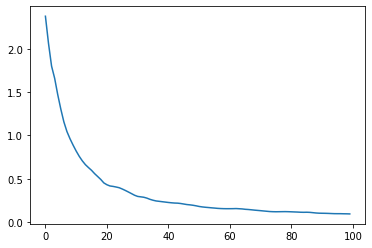

In [4]:
cfr_solver = cfr.CFRSolver(game)
cfr_convs = []
for i in range(100):
    if i % 10 == 0:
        print(i)
    cfr_solver.evaluate_and_update_policy()
    conv = exploitability.exploitability(game, cfr_solver.average_policy())
    cfr_convs.append(conv)
plt.plot(cfr_convs)

In [ ]:
mccfr_solver = outcome_sampling_mccfr.OutcomeSamplingSolver(game)
mccfr_convs = []
for i in range(10000):
    mccfr_solver.iteration()
    average_policy = policy.tabular_policy_from_callable(game, mccfr_solver.callable_avg_policy())
    conv = exploitability.exploitability(game, average_policy)
    mccfr_convs.append(conv)
plt.plot(mccfr_convs)

In [ ]:
plt.plot(mccfr_convs, label='MCCFR')
plt.plot(cfr_rand_convs, label='CFR Rand')
plt.legend()
plt.yscale('log')
plt.show()